## Recall - Association Rules

* Example: $\{butter\} \rightarrow \{whole.milk\}$
  * $Support(\textrm{butter and milk}) = \frac{\textrm{Num butter and milk}}{\textrm{Num Total}}$
  * $Support(\textrm{butter}) = \frac{\textrm{Num butter}}{\textrm{Nu
  m Total}}$
  * $Confidence= \frac{Support(\textrm{butter and milk})}{Support(\textrm{butter})}$
  * $Confidence= \frac{Confidence}{Support(\textrm{butter})}$
  

## Exercise - Compute the confidence and lift (small example)
![](./img/small_example.png)

## Arules with R (The long way)

* Use `dyplr` to 
  * mutate to compute logical values
  * summarize to compute counts and percents
  
  

## Read the data set

In [47]:
library(dplyr)
groceries <- read.csv("./data/Groceries.csv",
                      header = TRUE,
                      sep=",")
head(groceries, 2)

frankfurter,sausage,liver.loaf,ham,meat,finished.products,organic.sausage,chicken,turkey,pork,⋯,candles,light.bulbs,sound.storage.medium,newspapers,photo.film,pot.plants,flower.soil.fertilizer,flower..seeds.,shopping.bags,bags
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## Getting the total number of transactions

In [48]:
N <- nrow(groceries)
N

[1] 9835

## Set Up

In [49]:
(groceries 
 %>% select("butter", "whole.milk")
 %>% head
 ) 

butter,whole.milk
0,0
0,0
0,1
0,0
0,1
1,1


Compute the Total for Butter
========================================================

In [100]:
(groceries 
 %>% select("butter", "whole.milk")
 %>% filter(butter == 1) 
 %>% summarise(total_butter = sum(butter),
               support_butter = total_butter/N)
)

total_butter,support_butter
545,0.05541434


Compute the Proportion for Butter Directly
========================================================

* Why doesn't the `filter` matter?
* How did we get by without computing `total_butter`

In [101]:
(groceries 
 %>% select("butter", "whole.milk")
 %>% summarise(support_butter = sum(butter)/N)
 )

support_butter
0.05541434


<font color="red"> Exercise - Compute the Support of whole.milk </font>
========================================================

* Verify that the Whole Milk column is `whole.milk`
* Compute the support

In [102]:
# Your code here

<font color="blue"> Solution </font>
========================================================

In [103]:
(groceries 
 %>% select("butter", "whole.milk")
 %>% summarize(support_butter = sum(butter)/N,
               support_milk = sum(whole.milk)/N)
 )

support_butter,support_milk
0.05541434,0.255516


Support for Butter and Milk
========================================================

In [104]:
(groceries 
 %>% select("butter", "whole.milk")
 %>% mutate(bought_butter_and_milk = (butter == 1 & whole.milk == 1)) 
 %>% summarize(support_butter = sum(butter)/N,
               support_milk = sum(whole.milk)/N,
               support_butter_milk = sum(bought_butter_and_milk)/N)
 )

support_butter,support_milk,support_butter_milk
0.05541434,0.255516,0.02755465


Using `0`s and `1`s as Booleans
========================================================

Note that

* `TRUE & TRUE == TRUE` $\Leftrightarrow$ `1*1 == 1`
* `TRUE & FALSE == FALSE & TRUE == FALSE & FALSE == FALSE` $\Leftrightarrow$ `1*0 == 0*1 == 0*0 == 0`

In [74]:
(groceries 
 %>% select("butter", "whole.milk")
 %>% summarize(support_butter = sum(butter)/N,
               support_milk = sum(whole.milk)/N,
               support_butter_milk = sum( butter * whole.milk)/N)
 )

support_butter,support_milk,support_butter_milk
0.05541434,0.255516,0.02755465


Confidence and Lift
========================================================

In [76]:
(groceries 
 %>% select("butter", "whole.milk")
 %>% summarize(support_butter = sum(butter)/N,
               support_milk = sum(whole.milk)/N,
               support_butter_milk = sum( butter * whole.milk)/N)
 %>% mutate(conf_butter_milk = support_butter_milk/support_butter,
            lift_butter_milk = conf_butter_milk/support_milk)
 )

support_butter,support_milk,support_butter_milk,conf_butter_milk,lift_butter_milk
0.05541434,0.255516,0.02755465,0.4972477,1.946053


Notes
========================================================

* Must compute values before you use them
  * Compute supports before confidence
  * Compute confidence before lift

<font color="red"> Exercise </font>
========================================================

* Compute the confidence and lift for the following rules
  * $\{Cereal\} \rightarrow \{Whole Milk\}$
  * $\{Liquor\} \rightarrow \{Whole Milk\}$
* Try doing this with one `mutate`
* Interpret the values of the lift for each.

In [18]:
# Your code here

Example Data Frame
========================================================

In [19]:
df <- data.frame("a" = c(1,2),
                 "b" = c(3,4),
                 "c" = c(5,6),
                 "d" = c(7,8))
df

a,b,c,d
1,3,5,7
2,4,6,8


Stacking Columns with gather
========================================================

In [20]:
library(tidyr)
stacked <- df %>%
  gather(key = "Label",
         value = "Value",
         a, b, c)
stacked

d,Label,Value
7,a,1
8,a,2
7,b,3
8,b,4
7,c,5
8,c,6


Stacking All-But-One Column with gather
========================================================

In [21]:
library(tidyr)
stacked <- df %>%
  gather(key = "Label",
         value = "Value",
         -d)
stacked

d,Label,Value
7,a,1
8,a,2
7,b,3
8,b,4
7,c,5
8,c,6


Group and Aggregate with group_by
========================================================

In [22]:
stacked %>%
  group_by(Label) %>%
  summarize(mean = mean(Value))

Label,mean
a,1.5
b,3.5
c,5.5


Group and Aggregate with group_by
========================================================

In [23]:
stacked

d,Label,Value
7,a,1
8,a,2
7,b,3
8,b,4
7,c,5
8,c,6


In [24]:
stacked %>%
  group_by(Label) %>%
  summarize(mean = mean(Value))

Label,mean
a,1.5
b,3.5
c,5.5


Computing Many Rules At Once
========================================================

* `gather` the LHS into one column
* `group_by` LHS
* Compute values
  * Support
  * Confidence
  * Lift
  

Step 0 - Read the data and load libraries
========================================================

# Be sure to change the working directory

In [77]:
library(tidyr)
library(dplyr)

groceries <- read.csv("./data/Groceries.csv",
                      header = TRUE,
                      sep=",")
N <- nrow(groceries)

Step 1 - Stack all of the other products
========================================================

In [92]:
(groceries 
 %>% gather(key = "Other",
            value = "Purch",
            -whole.milk)
 %>% head
 )

whole.milk,Other,Purch
0,frankfurter,0
0,frankfurter,0
1,frankfurter,0
0,frankfurter,0
1,frankfurter,0
1,frankfurter,0


Step 2 - Compute the supports
========================================================

In [93]:
(groceries 
 %>% gather(key = "Other",
            value = "Purch",
            -whole.milk)
 %>% group_by(Other)
 %>% summarise(sup_milk = sum(whole.milk)/N,
               sup_lhs = sum(Purch)/N,
               sup_both = sum(Purch*whole.milk)/N) 
 %>% head(2)
 )

Other,sup_milk,sup_lhs,sup_both
abrasive.cleaner,0.255516,0.003558719,0.001626843
artif..sweetener,0.255516,0.003253686,0.001118454


Step 3 - Compute confidence, and lift 
========================================================

In [95]:
# Note that we group_by the products to keep them separate.
(groceries 
 %>% gather(key = "Other",
            value = "Purch",
            -whole.milk)
 %>% group_by(Other)
 %>% summarise(sup_milk = sum(whole.milk)/N,
               sup_lhs = sum(Purch)/N,
               sup_both = sum(Purch*whole.milk)/N) 
 %>% mutate(conf = sup_both/sup_lhs, 
            lift = conf/sup_milk)
 ) -> many_rules

View the results
========================================================

In [99]:
many_rules %>% arrange(desc(lift)) %>% head(2)

Other,sup_milk,sup_lhs,sup_both,conf,lift
kitchen.utensil,0.255516,0.0004067107,0.000305033,0.7500000,2.935237
honey,0.255516,0.0015251652,0.001118454,0.7333333,2.870009


Automate the process with the arules library
========================================================

In [34]:
#install.packages("arules")
library(arules)

Columns must be factors
========================================================

In [35]:
groc_factors <-
  groceries %>%
  mutate_if(is.integer, as.factor)


  

Make a transaction object
========================================================

In [36]:
groc_trans <-
  as(groc_factors, "transactions")


  

Compute the rules
========================================================

In [38]:
groc_rules <- apriori(groc_trans, 
                      parameter = list(supp = 0.0,
                                       conf = 0.0,
                                       maxlen = 2))
groc_rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
          0    0.1    1 none FALSE            TRUE       5       0      1
 maxlen target   ext
      2  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[338 item(s), 9835 transaction(s)] done [0.15s].
sorting and recoding items ... [338 item(s)] done [0.05s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2

Warning message in apriori(groc_trans, parameter = list(supp = 0, conf = 0, maxlen = 2)):
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”

 done [0.25s].
writing ... [114244 rule(s)] done [0.01s].
creating S4 object  ... done [0.04s].


set of 114244 rules 

Pull out the rules with whole.milk
========================================================

In [39]:
rules_with_milk <- 
  subset(groc_rules, 
         subset = rhs %in% "whole.milk=1")
inspect(sort(rules_with_milk, by = "lift")[1:10])

     lhs                      rhs            support      confidence lift    
[1]  {kitchen.utensil=1}   => {whole.milk=1} 0.0003050330 0.7500000  2.935237
[2]  {honey=1}             => {whole.milk=1} 0.0011184545 0.7333333  2.870009
[3]  {cereals=1}           => {whole.milk=1} 0.0036603965 0.6428571  2.515917
[4]  {rice=1}              => {whole.milk=1} 0.0046771734 0.6133333  2.400371
[5]  {rubbing.alcohol=1}   => {whole.milk=1} 0.0006100661 0.6000000  2.348189
[6]  {cocoa.drinks=1}      => {whole.milk=1} 0.0013218099 0.5909091  2.312611
[7]  {pudding.powder=1}    => {whole.milk=1} 0.0013218099 0.5652174  2.212062
[8]  {jam=1}               => {whole.milk=1} 0.0029486528 0.5471698  2.141431
[9]  {baking.powder=1}     => {whole.milk=1} 0.0092526690 0.5229885  2.046793
[10] {cooking.chocolate=1} => {whole.milk=1} 0.0013218099 0.5200000  2.035097
     count
[1]   3   
[2]  11   
[3]  36   
[4]  46   
[5]   6   
[6]  13   
[7]  13   
[8]  29   
[9]  91   
[10] 13   


Limiting the number of rules
========================================================

In [40]:
groc_rules <- apriori(groc_trans, 
                      parameter = list(supp = 0.75,
                                       conf = 0.70,
                                       maxlen = 2))
groc_rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.75      1
 maxlen target   ext
      2  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7376 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[338 item(s), 9835 transaction(s)] done [0.16s].
sorting and recoding items ... [168 item(s)] done [0.05s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2

Warning message in apriori(groc_trans, parameter = list(supp = 0.75, conf = 0.7, :
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”

 done [0.26s].
writing ... [28174 rule(s)] done [0.01s].
creating S4 object  ... done [0.03s].


set of 28174 rules 

Visualizing the Rules with arulesViz
========================================================

In [41]:
install.packages("arulesViz")

Making the Visualization
========================================================

Loading required package: grid


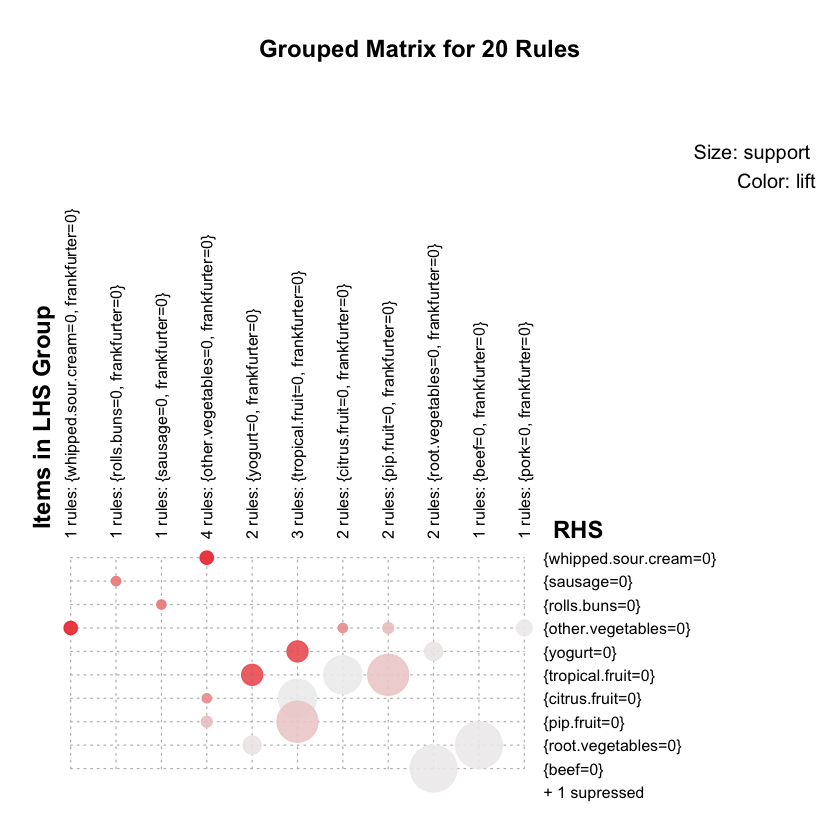

In [42]:
outcomes<-head(sort(groc_rules,by="lift"),20)

library(arulesViz)
plot(outcomes, method="grouped")